In [1]:
import pandas as pd
import numpy as np

In [2]:
# prompt: give code to connect with google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load dataset
amazon_food_data = pd.read_csv('/content/drive/My Drive/Amazon-Food-Reviews.csv')

In [4]:
amazon_food_data.head()

,Score,Summary,Text
0,1,"Great product, terrible price",Do not buy at this price! There are a dozen r...
1,1,Not impressed at ALL,"This product was not HORRIBLE, but I feel chea..."
2,1,Don't order from Amazon!,My dog loves this food and when I saw it here ...
3,1,"Maybe good cracker, but package was damaged","This may be a good cracker, but I had to retur..."
4,1,"Great rice, price is such a rip-off","It is a great product, however, who would spen..."


In [5]:
# Convert Score to Positive (4, 5) and Negative (1, 2, 3)
amazon_food_data['Sentiment'] = amazon_food_data['Score'].apply(lambda x: 'Positive' if x > 3 else 'Negative')

# Display the first few rows to verify the changes
print(amazon_food_data.head())

   Score                                      Summary  \
0      1                Great product, terrible price   
1      1                         Not impressed at ALL   
2      1                     Don't order from Amazon!   
3      1  Maybe good cracker, but package was damaged   
4      1          Great rice, price is such a rip-off   

                                                Text Sentiment  
0  Do not buy at this price!  There are a dozen r...  Negative  
1  This product was not HORRIBLE, but I feel chea...  Negative  
2  My dog loves this food and when I saw it here ...  Negative  
3  This may be a good cracker, but I had to retur...  Negative  
4  It is a great product, however, who would spen...  Negative  


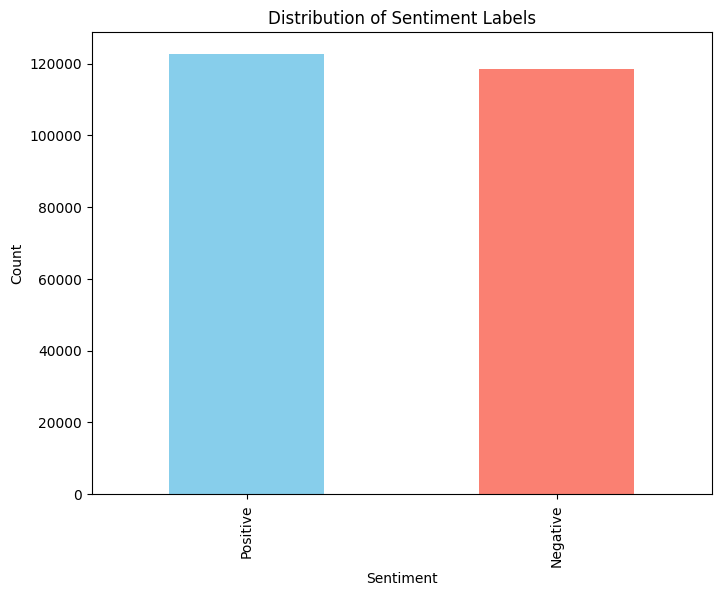

In [6]:
import matplotlib.pyplot as amazon_food_plt
# Plot distribution of Positive and Negative labels
sentiment_counts = amazon_food_data['Sentiment'].value_counts()
amazon_food_plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon'])
amazon_food_plt.title('Distribution of Sentiment Labels')
amazon_food_plt.xlabel('Sentiment')
amazon_food_plt.ylabel('Count')
amazon_food_plt.show()

In [7]:
sentiment_counts

,count
Sentiment,
Positive,122628
Negative,118443


In [8]:
# Balance the dataset to have 7500 samples for each class
positive_samples = amazon_food_data[amazon_food_data['Sentiment'] == 'Positive'].sample(n=7500)
negative_samples = amazon_food_data[amazon_food_data['Sentiment'] == 'Negative'].sample(n=7500)

# Combine balanced data
balanced_data = pd.concat([positive_samples, negative_samples]).reset_index(drop=True)

# Verify the balanced dataset
print(balanced_data['Sentiment'].value_counts())


Sentiment
Positive    7500
Negative    7500
Name: count, dtype: int64


In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define preprocessing function
def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove words with 2 or fewer characters
    text = ' '.join([word for word in text.split() if len(word) > 2])
    return text

# Apply the preprocessing function to the Text column
balanced_data['Processed_Text'] = balanced_data['Text'].apply(preprocess_text)

# Display the first few rows to verify
print(balanced_data[['Text', 'Processed_Text']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                                Text  \
0  I was very happy with this seasoning blend.<br...   
1  All of Murray's Sugar Free Cookies are excelle...   
2  The company should have put the grade in the d...   
3  These teas are wonderful! Couldn't recommend t...   
4  I have usually ordered my K-Cups direct from G...   

                                      Processed_Text  
0  was very happy with this seasoning blendbr rea...  
1  all murrays sugar free cookies are excellent b...  
2  the company should have put the grade the desc...  
3  these teas are wonderful couldnt recommend the...  
4  have usually ordered kcups direct from green m...  


In [10]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [11]:
balanced_data[['Text', 'Processed_Text']].head()

,Text,Processed_Text
0,I was very happy with this seasoning blend.<br...,was very happy with this seasoning blendbr rea...
1,All of Murray's Sugar Free Cookies are excelle...,all murrays sugar free cookies are excellent b...
2,The company should have put the grade in the d...,the company should have put the grade the desc...
3,These teas are wonderful! Couldn't recommend t...,these teas are wonderful couldnt recommend the...
4,I have usually ordered my K-Cups direct from G...,have usually ordered kcups direct from green m...


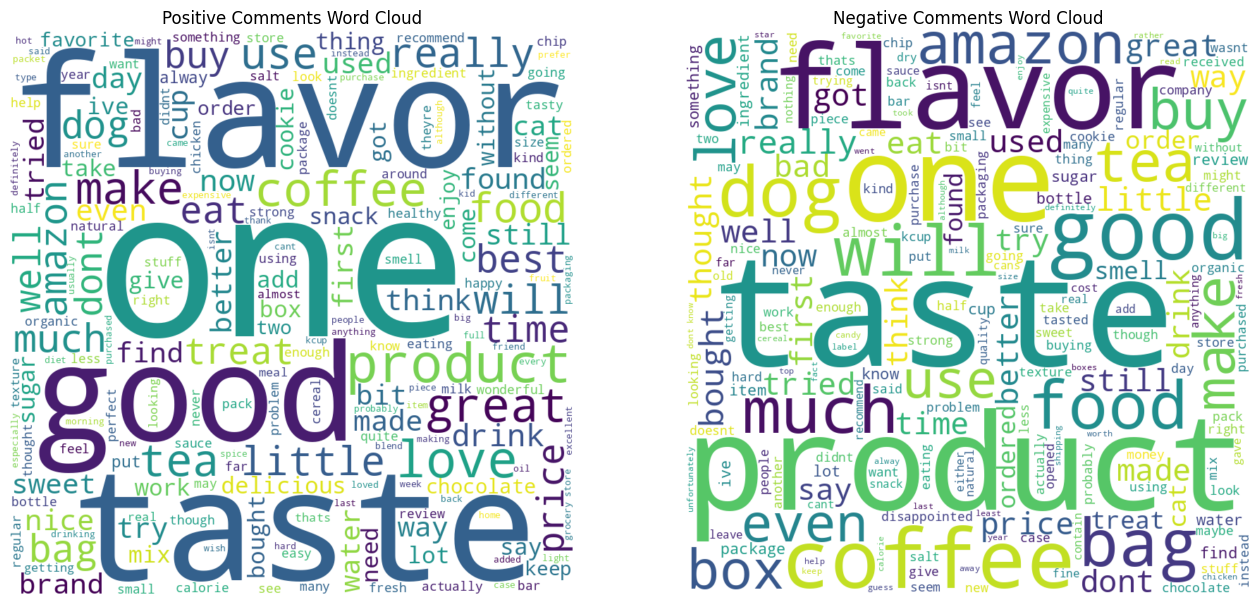

In [12]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Separate positive and negative comments
positive_comments = " ".join(balanced_data[balanced_data['Sentiment'] == 'Positive']['Processed_Text'])
negative_comments = " ".join(balanced_data[balanced_data['Sentiment'] == 'Negative']['Processed_Text'])


# Generate word cloud for positive comments
wordcloud_positive = WordCloud(width=800, height=800, background_color="white",
                               contour_width=1).generate(positive_comments)

# Generate word cloud for negative comments
wordcloud_negative = WordCloud(width=800, height=800, background_color="white",
                               contour_width=1).generate(negative_comments)

# Plot the word clouds side by side
plt.figure(figsize=(16, 8))

# Display positive word cloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.title("Positive Comments Word Cloud")
plt.axis("off")

# Display negative word cloud
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.title("Negative Comments Word Cloud")
plt.axis("off")

plt.show()


In [13]:
# Initialize the Porter stemmer
stemmer = PorterStemmer()

# Define function to remove stop words and apply stemming
def remove_stopwords_and_stem(text):
    # Remove stop words and apply stemming
    words = [stemmer.stem(word) for word in text.split() if word not in stop_words]
    return ' '.join(words)

# Apply the function to the Processed_Text column
balanced_data['Processed_Text'] = balanced_data['Processed_Text'].apply(remove_stopwords_and_stem)

# Display the first few rows to verify
balanced_data[['Text', 'Processed_Text']].head()


,Text,Processed_Text
0,I was very happy with this seasoning blend.<br...,happi season blendbr read african spice new yo...
1,All of Murray's Sugar Free Cookies are excelle...,murray sugar free cooki excel favorit pecan sh...
2,The company should have put the grade in the d...,compani put grade descript see grade enlarg ph...
3,These teas are wonderful! Couldn't recommend t...,tea wonder couldnt recommend morebr introduc t...
4,I have usually ordered my K-Cups direct from G...,usual order kcup direct green mountain thought...


In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Parameters
max_words = 5000  # Vocabulary size
max_len = 100  # Maximum sequence length

# Tokenize the text data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(balanced_data['Processed_Text'])
X = tokenizer.texts_to_sequences(balanced_data['Processed_Text'])
X = pad_sequences(X, maxlen=max_len)

# Convert labels to binary
y = balanced_data['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0).values

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

# CNN Model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
cnn_model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(10, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
history = cnn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test)
print(f"CNN Accuracy: {cnn_accuracy:.4f}")


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.6408 - loss: 0.6173 - val_accuracy: 0.7850 - val_loss: 0.4520
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.8584 - loss: 0.3449 - val_accuracy: 0.7927 - val_loss: 0.4466
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.9382 - loss: 0.1900 - val_accuracy: 0.7910 - val_loss: 0.5082
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9834 - loss: 0.0746 - val_accuracy: 0.7787 - val_loss: 0.6335
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.9980 - loss: 0.0183 - val_accuracy: 0.7830 - val_loss: 0.7710
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7829 - loss: 0.7581
CNN Accuracy: 0.7830


In [16]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = cnn_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print a detailed classification report
report = classification_report(y_test, y_pred, target_names=["Negative", "Postive"])
print("\nClassification Report:")
print(report)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Precision: 0.7842
Recall: 0.7837
F1 Score: 0.7839

Classification Report:
              precision    recall  f1-score   support

    Negative       0.78      0.78      0.78      1493
     Postive       0.78      0.78      0.78      1507

    accuracy                           0.78      3000
   macro avg       0.78      0.78      0.78      3000
weighted avg       0.78      0.78      0.78      3000



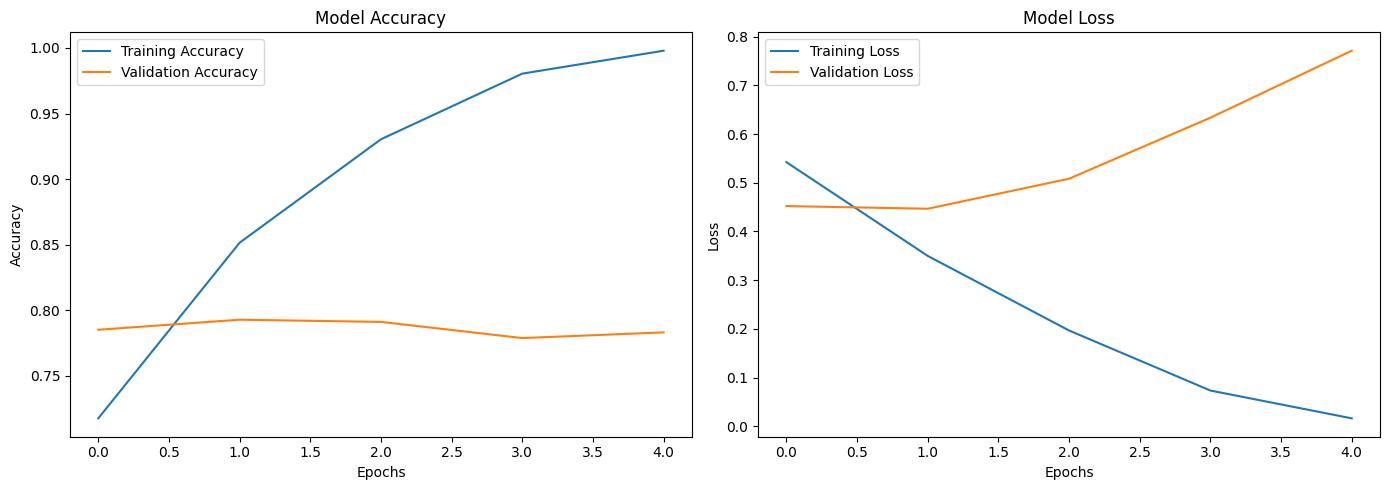

In [17]:
# Plot accuracy and loss graphs
# Accuracy
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt

# RNN Model
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
rnn_model.add(LSTM(64, return_sequences=False))
rnn_model.add(Dense(10, activation='relu'))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the RNN model and save the training history
history = rnn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the RNN model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test, y_test)
print(f"RNN Accuracy: {rnn_accuracy:.4f}")


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


375/375 ━━━━━━━━━━━━━━━━━━━━ 35s 86ms/step - accuracy: 0.6713 - loss: 0.5952 - val_accuracy: 0.7873 - val_loss: 0.4564
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 80ms/step - accuracy: 0.8469 - loss: 0.3583 - val_accuracy: 0.7897 - val_loss: 0.4532
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 80ms/step - accuracy: 0.8859 - loss: 0.2790 - val_accuracy: 0.7843 - val_loss: 0.4848
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 80ms/step - accuracy: 0.9156 - loss: 0.2182 - val_accuracy: 0.7720 - val_loss: 0.5874
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 80ms/step - accuracy: 0.9369 - loss: 0.1598 - val_accuracy: 0.7793 - val_loss: 0.7176
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7839 - loss: 0.7078
RNN Accuracy: 0.7793


In [19]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = rnn_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print a detailed classification report
report = classification_report(y_test, y_pred, target_names=["Negative", "Postive"])
print("\nClassification Report:")
print(report)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
Precision: 0.7642
Recall: 0.8109
F1 Score: 0.7869

Classification Report:
              precision    recall  f1-score   support

    Negative       0.80      0.75      0.77      1493
     Postive       0.76      0.81      0.79      1507

    accuracy                           0.78      3000
   macro avg       0.78      0.78      0.78      3000
weighted avg       0.78      0.78      0.78      3000



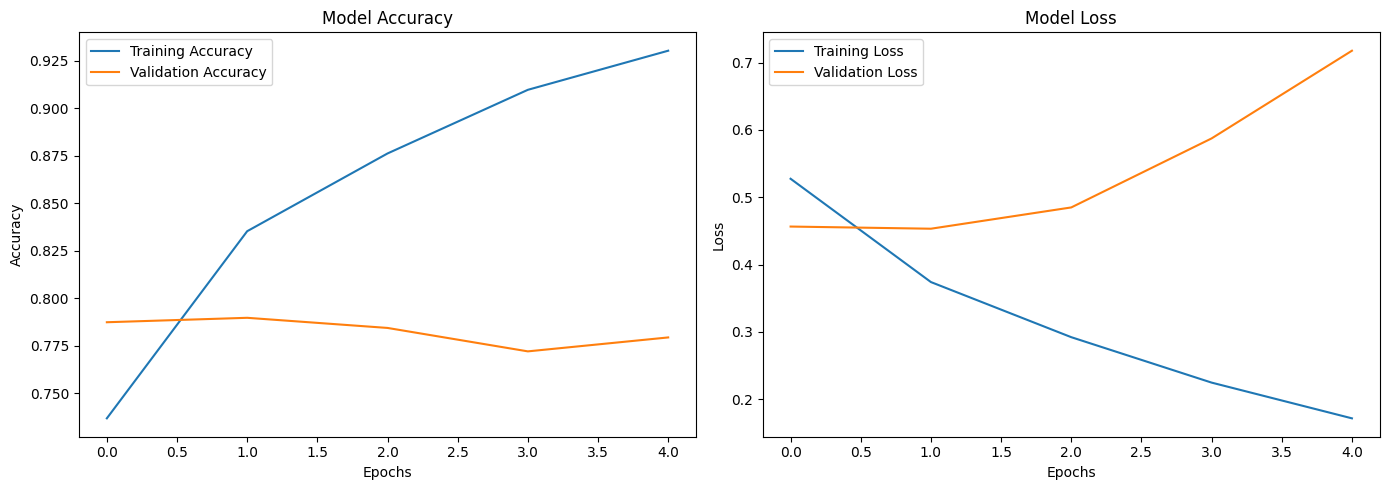

In [20]:

# Plot accuracy and loss graphs
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
